In [1]:
from htrc_features import FeatureReader
import numpy as np
import pandas as pd

In [2]:
def get_htrc_page_data(document):
    fr = FeatureReader([document])
    vol = next(fr.volumes())
#     ptc = vol.tokenlist(pos=False, case=False).reset_index().drop(['section'], axis=1)
    ptc = vol.tokenlist(pos=True, case=False).reset_index().drop(['section'], axis=1)
    ptc = ptc[ptc["pos"]=="NN"]
# make it only grab the pos you're interested in- either go into ht or make new cell, vol=
    page_list = set(ptc['page'])
    
    # extract tokens by page 
    tokens=list()
    for page in page_list:
        page_data = str()
        
        # operate on each token
        for page_tokens in ptc.loc[ptc['page'] == page].iterrows():
            if page_tokens[1][1].isalpha():
                
                # deal with frequency count by creating correct number of tokens
                page_data += (' '.join([page_tokens[1][1]] * page_tokens[1][3])) + " "

        tokens.append(page_data.split())
    return tokens

In [3]:
fr = FeatureReader(["mdp.39015038888775"])
vol = next(fr.volumes())
ptc = vol.tokenlist(pos=True, case=False).reset_index().drop(['section'], axis=1)

/Users/jed/miniforge3/envs/cv/lib/python3.9/site-packages/htrc_features/feature_reader.py:107: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.reset_index().groupby(groups).sum()[['count']]


In [4]:
#ptc= ptc[ptc["pos"]=="NN"]
#page_list = set(ptc['page'])

# extract tokens by page 
#tokens=list()
#for page in page_list:
#    page_data = str()

    # operate on each token
#    for page_tokens in ptc.loc[ptc['page'] == page].iterrows():
#        print(page_tokens[1][3])
#         if page_tokens[1][1].isalpha():
#             page_data += (' '.join([page_tokens[1][1]] * page_tokens[1][2])) + " "


In [5]:
# return bibliographic data
def get_htrc_metadata(document):
    fr = FeatureReader([document])
    vol = next(fr.volumes())
    return([vol.author[0],vol.title,vol.year])

In [6]:
# htids for two classes 
hard_sf = ["mdp.39015038888775", "pst.000027847633", "mdp.39015013517985", "mdp.39015020680461", "mdp.39015020690858", "pst.000029273768", "mdp.39015013433738", "mdp.39015056817003", "mdp.39015012435791", "pst.000059688501", "mdp.39015025252100", "uc1.32106007713453", "uc1.32106012964117", "mdp.39015025286538", "mdp.39015041888606"]
soft_sf = ["mdp.39015020645456", "mdp.39015003922005", "mdp.39015000244775", "mdp.39015000244775", "pst.000011824909", "mdp.49015000529041", "mdp.39015005320745", "mdp.49015003071447", "inu.30000004080028", "mdp.39015054037372", "mdp.39015040597794", "mdp.39015002289877", "mdp.39015055883048", "inu.30000007203650", "mdp.49015002042977"]

In [7]:
all_texts = hard_sf + soft_sf

In [8]:
# create labels for classifier
labels = ["hard"] * len(hard_sf) + ["soft"] * len(soft_sf)

In [22]:
md = pd.DataFrame([get_htrc_metadata(text) for text in all_texts])
md.columns={"Author","Title","Pub Year"}
md['label'] = labels
md

,Author,Title,Pub Year,label
0,"Sagan, Carl, 1934-1996.",Contact : a novel /,1985,hard
1,"Huxley, Aldous, 1894-1963.",Brave new world : a novel by Aldous Huxley.,1932,hard
2,"Hoyle, Fred, Sir.",The black cloud /,1960,hard
3,"Clarke, Arthur C. (Arthur Charles), 1917-2008",A fall of moondust.,1961,hard
4,"Crichton, Michael, 1942-2008.",The Andromeda strain.,1969,hard
5,"Niven, Larry.",Ringworld : a novel /,1970,hard
6,"Clement, Hal, 1922-2003.",Mission of gravity /,1978,hard
7,"Morgan, Richard K., 1965-",Altered carbon /,2003,hard
8,"Anderson, Poul, 1926-2001.",Tau zero /,1970,hard
9,"Asimov, Isaac, 1920-1992",Foundation.,1951,hard


In [9]:
# construct text for consumption into dtm
raw_data = list()
for doc in hard_sf + soft_sf:
    page_data = get_htrc_page_data(doc)
    tokens = ' '.join([w for p in page_data for w in p])
    raw_data.append(tokens)

/Users/jed/miniforge3/envs/cv/lib/python3.9/site-packages/htrc_features/feature_reader.py:107: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.reset_index().groupby(groups).sum()[['count']]
/Users/jed/miniforge3/envs/cv/lib/python3.9/site-packages/htrc_features/feature_reader.py:107: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.reset_index().groupby(groups).sum()[['count']]
/Users/jed/miniforge3/envs/cv/lib/python3.9/site-packages/htrc_features/feature_reader.py:107: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only wil

/Users/jed/miniforge3/envs/cv/lib/python3.9/site-packages/htrc_features/feature_reader.py:107: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.reset_index().groupby(groups).sum()[['count']]
/Users/jed/miniforge3/envs/cv/lib/python3.9/site-packages/htrc_features/feature_reader.py:107: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return df.reset_index().groupby(groups).sum()[['count']]
/Users/jed/miniforge3/envs/cv/lib/python3.9/site-packages/htrc_features/feature_reader.py:107: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only wil

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(input='content',
                             stop_words='english',
                             strip_accents='unicode')

In [11]:
dtm = vec.fit_transform(raw_data)

In [12]:
dtm.shape
# large sparse matrix: 17,41229

(30, 18890)

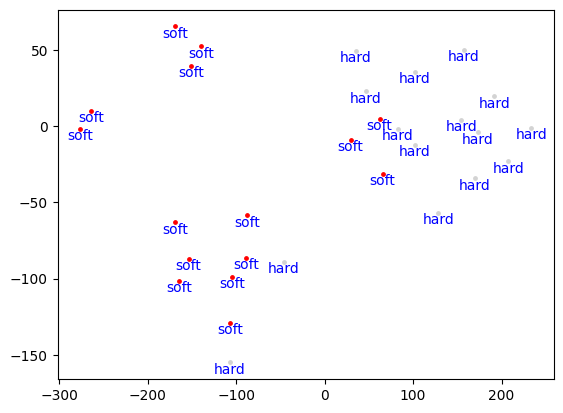

In [13]:
# T-SNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# fig = plt.figure(figsize=(35, 20), dpi=75)
plot = TSNE(n_components=2, learning_rate='auto',
            init='random', 
            perplexity=3).fit_transform(dtm)

for x, y, label,htid in zip(plot[:,0], plot[:,1], labels,all_texts):
    if label == "hard":
        plt.scatter(x, y, c='lightgrey',s=6)
    else:
        plt.scatter(x, y, c='red',s=6)
    plt.text(x, y, label, c='blue', ha='center', va='top')

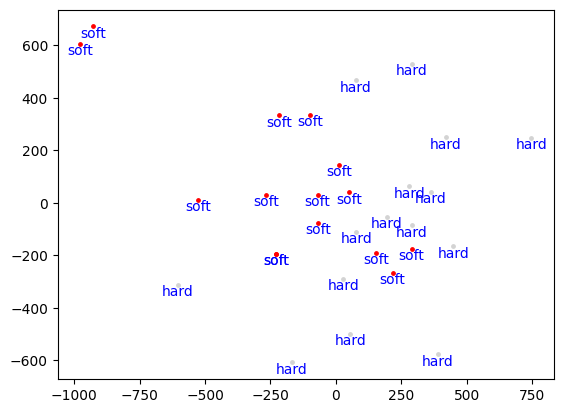

In [14]:
# MDS

# fig = plt.figure(figsize=(35, 20), dpi=75)

from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=1)
plot = mds.fit_transform(dtm.toarray())
for x, y, label,htid in zip(plot[:,0], plot[:,1], labels,all_texts):
    if label == "hard":
        plt.scatter(x, y, c='lightgrey',s=6)
    else:
        plt.scatter(x, y, c='red',s=6)
    plt.text(x, y, label, c='blue', ha='center', va='top')

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

clf = SGDClassifier(tol=None,max_iter=1000,random_state=42).fit(dtm,labels)

<AxesSubplot: title={'center': 'Key Features: Hard'}>

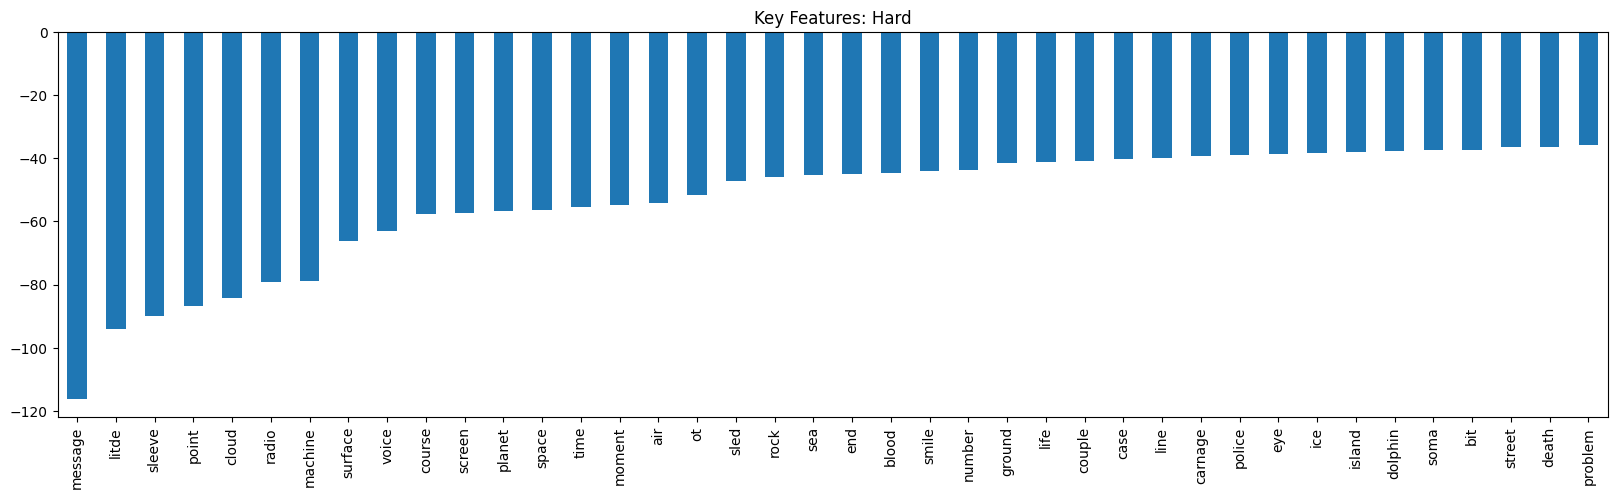

In [16]:
df = pd.DataFrame([clf.coef_[0][idx] for idx in np.argsort(clf.coef_[0])[:40]],
                  index = [vec.get_feature_names_out()[idx] for idx in np.argsort(clf.coef_[0])[:40]])
df.plot(figsize=(20, 5),kind='bar',title='Key Features: Hard',legend=False)

# would be interesting to remove things like character names/spec pos tags 
# expand collections 
# semantic meaning: presence of word/repetitions

<AxesSubplot: title={'center': 'Key Features: Soft'}>

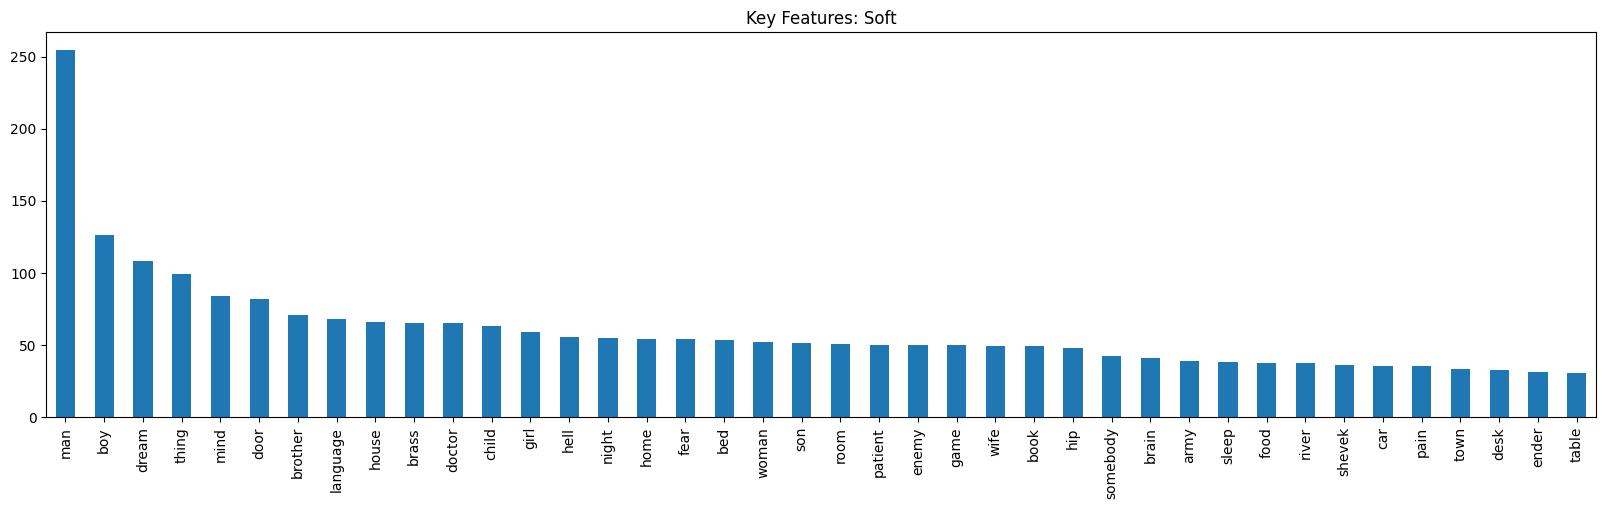

In [17]:
df = pd.DataFrame([clf.coef_[0][idx] for idx in np.argsort(clf.coef_[0])[::-1][:40]],
                  index = [vec.get_feature_names_out()[idx] for idx in np.argsort(clf.coef_[0])[::-1][:40]])
df.plot(figsize=(20, 5),kind='bar',title='Key Features: Soft',legend=False)